In [2]:
!pip install --upgrade google-cloud-storage matplotlib numpy pandas seaborn google-cloud

    100% |████████████████████████████████| 51kB 540kB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 1.9MB/s ta 0:00:011
    100% |████████████████████████████████| 92kB 1.6MB/s ta 0:00:011
Requirement already up-to-date: six in ./venv/lib/python3.5/site-packages (from google-resumable-media>=0.2.3->google-cloud-storage)
    100% |████████████████████████████████| 71kB 3.0MB/s ta 0:00:011
    100% |████████████████████████████████| 61kB 2.5MB/s ta 0:00:011
  Using cached rsa-3.4.2-py2.py3-none-any.whl
    100% |████████████████████████████████| 133kB 913kB/s ta 0:00:01
  Using cached idna-2.5-py2.py3-none-any.whl
    100% |████████████████████████████████| 358kB 1.5MB/s ta 0:00:01
  Using cached chardet-3.0.4-py2.py3-none-any.whl
    100% |████████████████████████████████| 276kB 1.8MB/s ta 0:00:01
  Using cached monotonic-1.3-py2.py3-none-any.whl
  Using cached setuptools-36.2.7-py2.py3-none-any.whl
  Running setup.py install for tenacity ... done
  Found existing insta

In [291]:
def parse(name, raw):
    nsp = name.split("/")
    rows = {"transcript": [], "gene": [], "entry": nsp[1], "sim": nsp[2]}
    for row in raw.splitlines():
        sp = row.split("\t")
        if sp[0].startswith("T_"):
            rows["transcript"].append(sp)
        else:
            rows["gene"].append(sp)
    return name, rows

In [1]:
from google.cloud import storage
client = storage.Client(project="isb-cgc-04-0029")
bucket = client.get_bucket('smc-rna-buchanan-eval-viz')

out0_blobs = [b for b in bucket.list_blobs(prefix="eval-all-outputs") if "out0.fusions" in b.name]
out0_raw = {o.name: o.download_as_string().decode("utf-8") for o in out0_blobs}

In [292]:
out0_parsed = dict(parse(k, v) for k, v in out0_raw.items())

In [46]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [293]:
list(out0_parsed.items())[:10]

[('eval-all-outputs/7269246/sim61/out0.fusions',
  {'entry': '7269246',
   'gene': [['G_TP', 'HSPB11', 'SLC28A1'],
    ['G_TP', 'TNR', 'PSMC5'],
    ['G_TP', 'RP11-452H21.1', 'HMCN1'],
    ['G_TP', 'NARS2', 'HMCN1'],
    ['G_TP', 'LRP6', 'PCK1'],
    ['G_TP', 'LONP2', 'COX20'],
    ['G_TP', 'LONP2', 'HNRNPU-AS1'],
    ['G_TP', 'CTC-435M10.3', 'SPTSSB'],
    ['G_TP', 'BCKDHA', 'SPTSSB'],
    ['G_TP', 'MFSD2B', 'MUC21'],
    ['G_TP', 'LHFPL4', 'TMTC2'],
    ['G_TP', 'ZNF330', 'ATP6AP1L'],
    ['G_FP', 'RP11-353N4.6', 'RP3-328E19.4'],
    ['G_FP', 'RP11-277L2.3', 'RP3-328E19.4'],
    ['G_FP', 'RP11-353N4.6', 'RP11-763B22.4'],
    ['G_FP', 'RP11-353N4.6', 'RP11-763B22.3'],
    ['G_FP', 'RP11-277L2.3', 'RP11-763B22.4'],
    ['G_FP', 'RP11-277L2.3', 'RP11-763B22.3'],
    ['G_FP', 'MSTO1', 'ASH1L'],
    ['G_FP', 'MSTO1', 'ASH1L-AS1'],
    ['G_FP', 'MSTO2P', 'ASH1L'],
    ['G_FP', 'MSTO2P', 'ASH1L-AS1'],
    ['G_FP', 'YY1AP1', 'ASH1L'],
    ['G_FP', 'YY1AP1', 'ASH1L-AS1'],
    ['G_FP', 'DAP3',

In [294]:
out0_trans = {k: v["transcript"]  for k, v in out0_parsed.items()}

In [295]:
list(out0_trans.items())[0]

('eval-all-outputs/7269246/sim61/out0.fusions',
 [['T_FN', 'ENST00000421169', 'ENST00000439350'],
  ['T_FN', 'ENST00000585522', 'ENST00000545274'],
  ['T_FN', 'ENST00000194214', 'ENST00000537703'],
  ['T_FN', 'ENST00000422274', 'ENST00000580864'],
  ['T_FN', 'ENST00000414644', 'ENST00000407422'],
  ['T_FN', 'ENST00000287585', 'ENST00000549919'],
  ['T_FN', 'ENST00000549569', 'ENST00000369291'],
  ['T_FN', 'ENST00000535754', 'ENST00000411948'],
  ['T_FN', 'ENST00000528850', 'ENST00000271588'],
  ['T_FN', 'ENST00000535731', 'ENST00000543666'],
  ['T_FN', 'ENST00000338315', 'ENST00000486149'],
  ['T_FN', 'ENST00000378763', 'ENST00000429001'],
  ['T_FN', 'ENST00000444636', 'ENST00000343307'],
  ['T_FN', 'ENST00000595085', 'ENST00000497137'],
  ['T_FN', 'ENST00000333407', 'ENST00000380985'],
  ['T_FN', 'ENST00000507113', 'ENST00000376393'],
  ['T_FP', 'ENSG00000269501', 'ENSG00000223491'],
  ['T_FP', 'ENSG00000269501', 'ENSG00000233586'],
  ['T_FP', 'ENSG00000132676', 'ENSG00000116539'],
  

In [64]:
%matplotlib inline

In [313]:
import numpy as np
import pandas as pd

a = list(out0_trans.items())[0]
frames = []

for k, v in out0_parsed.items():
    d = pd.DataFrame({
        "eval": k,
        "entry": v["entry"],
        "sim": v["sim"],
        "trans_fusion_a": pd.Series([r[1] for r in v["transcript"]]),
        "trans_fusion_b": pd.Series([r[2] for r in v["transcript"]]),
        "value": pd.Series([r[0] for r in v["transcript"]]),
    })
    frames.append(d)
    
df = pd.concat(frames)
#df = dff[dff["sim"] == "sim46"].copy()
df["trans_fusion"] = df["trans_fusion_a"] + "-" + df["trans_fusion_b"]

deduped = df.drop_duplicates(subset=["eval", "trans_fusion"]).copy()
deduped.replace({"value": {
    "T_FP": 1,
    "T_FN": 2,
    "T_TP": 3,
}}, inplace=True)

pivoted = deduped.pivot_table(index=["entry", "sim"], columns="trans_fusion", values=["value"], fill_value=0)
dupes = df[df.duplicated(subset=["eval", "trans_fusion"])]


In [314]:
pivoted

value                                            \
trans_fusion  A3GALT2--CCL3L3 AADACL4--NPLOC4 ABCA8--ABCA9 ABCF1--DCTN4   
entry   sim                                                               
7185743 sim20               0               0            0            0   
        sim22               0               0            0            0   
        sim23               0               0            0            0   
        sim24               0               0            0            0   
        sim31               0               0            0            0   
        sim32               0               0            0            0   
        sim33               0               0            0            0   
        sim34               0               0            0            0   
        sim36               0               0            0            0   
        sim37               0               0            0            0   
        sim38               0               0            0            0   
        sim39               0               0            0            0   
        sim40               0               0            0            0   
        sim46               0               0            0            0   
        sim47               0               0            0            0   
        sim48               0               0            0            0   
        sim49               0               0            0            0   
        sim50               0               0            0            0   
        sim57               0               0            0            0   
        sim58               0               0            0            0   
        sim59               0               0            0            0   
        sim6                0               0            0            0   
        sim60               0               0            0            0   
        sim61               0               0            0            0   
        sim62               0               0            0            0   
7252855 sim24               0               0            0            0   
        sim31               0               0            0            0   
        sim32               0               0            0            0   
        sim34               0               0            0            0   
        sim37               0               0            0            0   
...                       ...             ...          ...          ...   
9610021 sim48               0               0            0            0   
        sim49               0               0            0            0   
        sim50               0               0            0            0   
        sim57               0               0            0            0   
        sim58               0               0            0            0   
        sim59               0               0            0            0   
        sim6                0               0            0            0   
        sim60               0               0            0            0   
        sim61               0               0            0            0   
        sim62               0               0            0            0   
9610272 sim20               1               0            0            0   
        sim22               0               0            0            1   
        sim23               0               0            0            0   
        sim24               0               0            0            0   
        sim37               0               1            0            0   
        sim38               0               0            0            0   
        sim39               0               0            0            0   
        sim40               0               0            0            0   
        sim46               0               0            0            0   
        sim47               0               0    

In [107]:
with pd.option_context("display.max_rows", None):
    df["trans_fusion"]

0                        ENST00000421169-ENST00000439350
1                        ENST00000585522-ENST00000545274
2                        ENST00000194214-ENST00000537703
3                        ENST00000422274-ENST00000580864
4                        ENST00000414644-ENST00000407422
5                        ENST00000287585-ENST00000549919
6                        ENST00000549569-ENST00000369291
7                        ENST00000535754-ENST00000411948
8                        ENST00000528850-ENST00000271588
9                        ENST00000535731-ENST00000543666
10                       ENST00000338315-ENST00000486149
11                       ENST00000378763-ENST00000429001
12                       ENST00000444636-ENST00000343307
13                       ENST00000595085-ENST00000497137
14                       ENST00000333407-ENST00000380985
15                       ENST00000507113-ENST00000376393
16                       ENSG00000269501-ENSG00000223491
17                       ENSG00

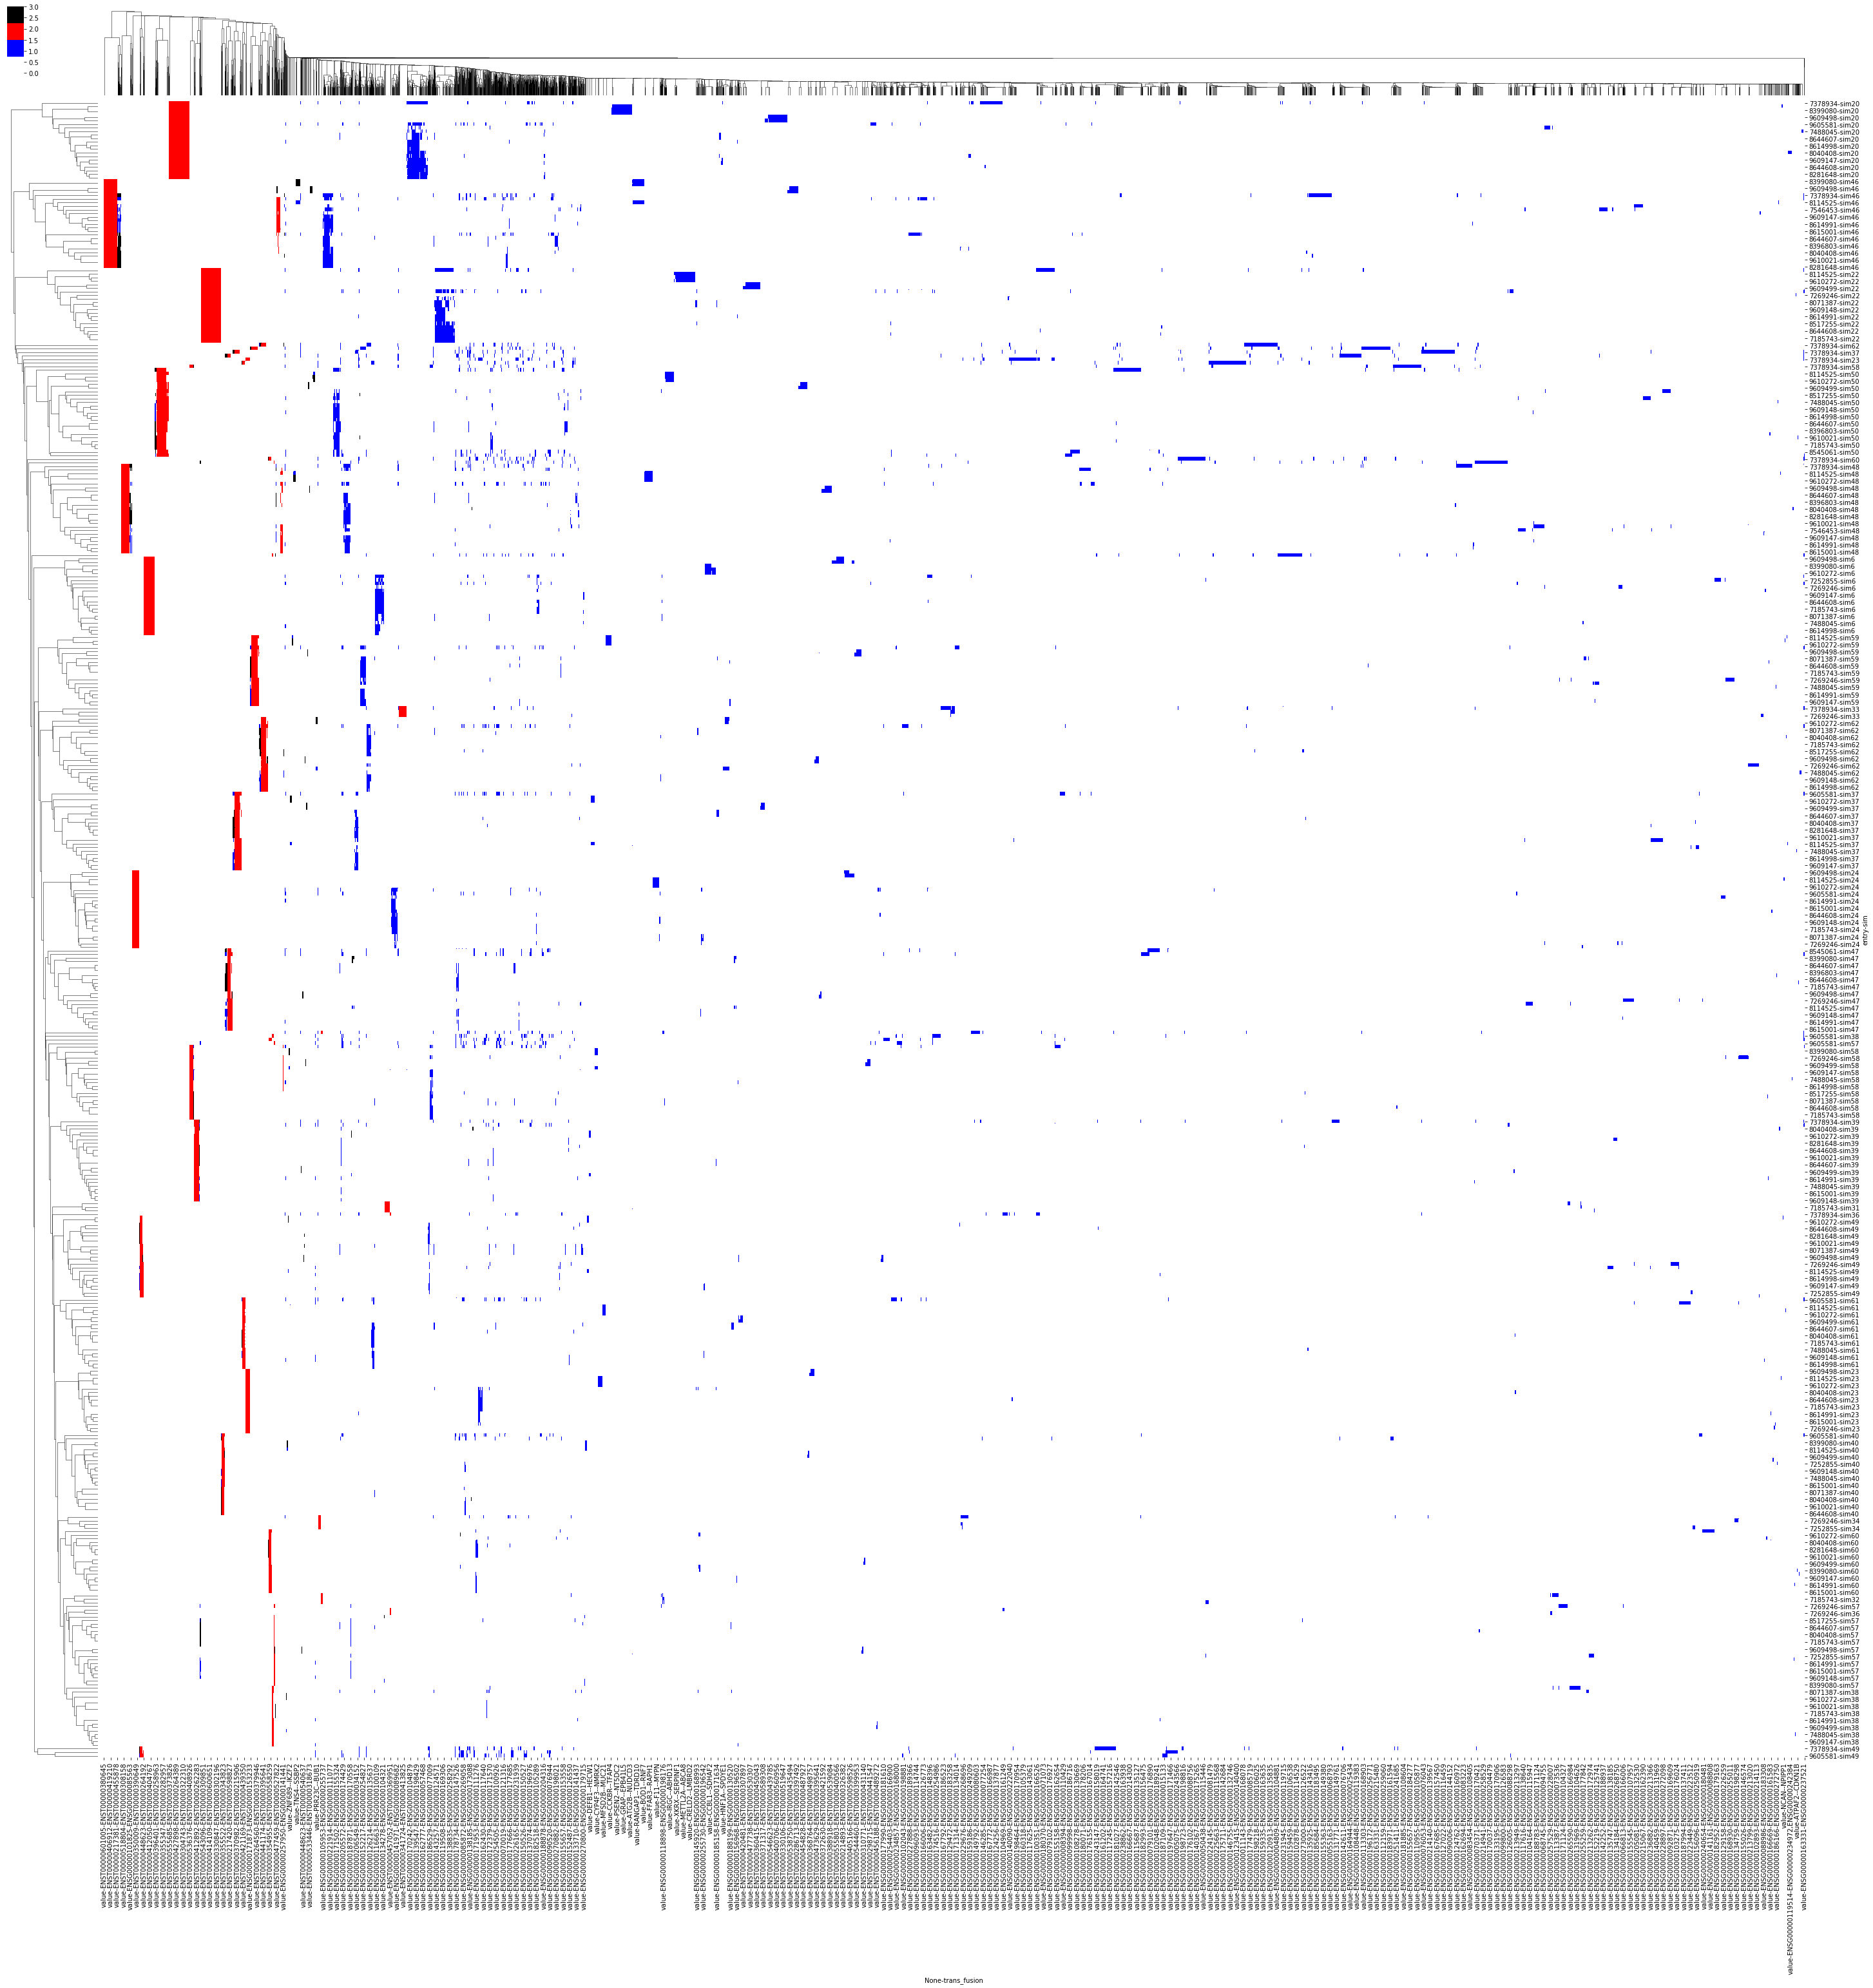

In [315]:
import seaborn as sb
from matplotlib.colors import ListedColormap
from matplotlib import pyplot
#pyplot.figure(figsize=(50, 50))

sb.clustermap(pivoted, cmap=ListedColormap(['white', 'blue', 'red', "black"]), figsize=(50, 50))
#deduped["value_cat"].cat.codes

In [304]:
df["value"].value_counts()

T_FP    1815
T_FN    1704
T_TP     246
Name: value, dtype: int64

In [305]:
deduped["value"].value_counts()

1    1793
2    1704
3     246
Name: value, dtype: int64

In [299]:
df

,entry,eval,sim,trans_fusion_a,trans_fusion_b,value,trans_fusion
0,7269246,eval-all-outputs/7269246/sim61/out0.fusions,sim61,ENST00000421169,ENST00000439350,T_FN,ENST00000421169-ENST00000439350
1,7269246,eval-all-outputs/7269246/sim61/out0.fusions,sim61,ENST00000585522,ENST00000545274,T_FN,ENST00000585522-ENST00000545274
2,7269246,eval-all-outputs/7269246/sim61/out0.fusions,sim61,ENST00000194214,ENST00000537703,T_FN,ENST00000194214-ENST00000537703
3,7269246,eval-all-outputs/7269246/sim61/out0.fusions,sim61,ENST00000422274,ENST00000580864,T_FN,ENST00000422274-ENST00000580864
4,7269246,eval-all-outputs/7269246/sim61/out0.fusions,sim61,ENST00000414644,ENST00000407422,T_FN,ENST00000414644-ENST00000407422
5,7269246,eval-all-outputs/7269246/sim61/out0.fusions,sim61,ENST00000287585,ENST00000549919,T_FN,ENST00000287585-ENST00000549919
6,7269246,eval-all-outputs/7269246/sim61/out0.fusions,sim61,ENST00000549569,ENST00000369291,T_FN,ENST00000549569-ENST00000369291
7,7269246,eval-all-outputs/7269246/sim61/out0.fusions,sim61,ENST00000535754,ENST00000411948,T_FN,ENST00000535754-ENST00000411948
8,7269246,eval-all-outputs/7269246/sim61/out0.fusions,sim61,ENST00000528850,ENST00000271588,T_FN,ENST00000528850-ENST00000271588
9,7269246,eval-all-outputs/7269246/sim61/out0.fusions,sim61,ENST00000535731,ENST00000543666,T_FN,ENST00000535731-ENST00000543666


In [317]:
deduped.pivot_table(index=["entry", "sim"], columns="trans_fusion", values=["value"], fill_value=0, aggfunc=[np.sum])

sum                                            \
                        value                                             
trans_fusion  A3GALT2--CCL3L3 AADACL4--NPLOC4 ABCA8--ABCA9 ABCF1--DCTN4   
entry   sim                                                               
7185743 sim20               0               0            0            0   
        sim22               0               0            0            0   
        sim23               0               0            0            0   
        sim24               0               0            0            0   
        sim31               0               0            0            0   
        sim32               0               0            0            0   
        sim33               0               0            0            0   
        sim34               0               0            0            0   
        sim36               0               0            0            0   
        sim37               0               0            0            0   
        sim38               0               0            0            0   
        sim39               0               0            0            0   
        sim40               0               0            0            0   
        sim46               0               0            0            0   
        sim47               0               0            0            0   
        sim48               0               0            0            0   
        sim49               0               0            0            0   
        sim50               0               0            0            0   
        sim57               0               0            0            0   
        sim58               0               0            0            0   
        sim59               0               0            0            0   
        sim6                0               0            0            0   
        sim60               0               0            0            0   
        sim61               0               0            0            0   
        sim62               0               0            0            0   
7252855 sim24               0               0            0            0   
        sim31               0               0            0            0   
        sim32               0               0            0            0   
        sim34               0               0            0            0   
        sim37               0               0            0            0   
...                       ...             ...          ...          ...   
9610021 sim48               0               0            0            0   
        sim49               0               0            0            0   
        sim50               0               0            0            0   
        sim57               0               0            0            0   
        sim58               0               0            0            0   
        sim59               0               0            0            0   
        sim6                0               0            0            0   
        sim60               0               0            0            0   
        sim61               0               0            0            0   
        sim62               0               0            0            0   
9610272 sim20               1               0            0            0   
        sim22               0               0            0            1   
        sim23               0               0            0            0   
        sim24               0               0            0            0   
        sim37               0               1            0            0   
        sim38               0               0            0            0   
        sim39               0               0            0            0   
        sim40               0               0            0            0   
        sim46               0               0      

In [370]:
z = df.copy()
z["value"].fillna("T_TN", inplace=True)
z["cat"] = z["value"].astype("category")
g = z.groupby(["entry", "sim", "cat"])
g.count()

eval  trans_fusion_a  trans_fusion_b  value  trans_fusion
entry   sim   cat                                                            
7185743 sim20 T_FN  89.0            89.0            89.0   89.0          89.0
              T_FP  91.0            91.0            91.0   91.0          91.0
              T_TP   NaN             NaN             NaN    NaN           NaN
        sim22 T_FN  87.0            87.0            87.0   87.0          87.0
              T_FP  86.0            86.0            86.0   86.0          86.0
              T_TP   NaN             NaN             NaN    NaN           NaN
        sim23 T_FN  18.0            18.0            18.0   18.0          18.0
              T_FP  18.0            18.0            18.0   18.0          18.0
              T_TP   NaN             NaN             NaN    NaN           NaN
        sim24 T_FN  32.0            32.0            32.0   32.0          32.0
              T_FP  29.0            29.0            29.0   29.0          29.0
              T_TP   NaN             NaN             NaN    NaN           NaN
        sim31 T_FN  22.0            22.0            22.0   22.0          22.0
              T_FP   6.0             6.0             6.0    6.0           6.0
              T_TP   NaN             NaN             NaN    NaN           NaN
        sim32 T_FN   8.0             8.0             8.0    8.0           8.0
              T_FP   9.0             9.0             9.0    9.0           9.0
              T_TP   NaN             NaN             NaN    NaN           NaN
        sim33 T_FN  34.0            34.0            34.0   34.0          34.0
              T_FP  20.0            20.0            20.0   20.0          20.0
              T_TP   NaN             NaN             NaN    NaN           NaN
        sim34 T_FN  13.0            13.0            13.0   13.0          13.0
              T_FP   7.0             7.0             7.0    7.0           7.0
              T_TP   NaN             NaN             NaN    NaN           NaN
        sim36 T_FN   6.0             6.0             6.0    6.0           6.0
              T_FP   7.0             7.0             7.0    7.0           7.0
              T_TP   NaN             NaN             NaN    NaN           NaN
        sim37 T_FN  20.0            20.0            20.0   20.0          20.0
              T_FP  19.0            19.0            19.0   19.0          19.0
              T_TP   9.0             9.0             9.0    9.0           9.0
...                  ...             ...             ...    ...           ...
9610272 sim48 T_FN  37.0            37.0            37.0   37.0          37.0
              T_FP  35.0            35.0            35.0   35.0          35.0
              T_TP   9.0             9.0             9.0    9.0           9.0
        sim49 T_FN  11.0            11.0            11.0   11.0          11.0
              T_FP   9.0             9.0             9.0    9.0           9.0
              T_TP   5.0             5.0             5.0    5.0           5.0
        sim50 T_FN  42.0            42.0            42.0   42.0          42.0
              T_FP  37.0            37.0            37.0   37.0          37.0
              T_TP  10.0            10.0            10.0   10.0          10.0
        sim57 T_FN   2.0             2.0             2.0    2.0           2.0
              T_FP   2.0             2.0             2.0    2.0           2.0
              T_TP   4.0             4.0             4.0    4.0           4.0
        sim58 T_FN  17.0            17.0            17.0   17.0          17.0
              T_FP  13.0            13.0            13.0   13.0          13.0
              T_TP   4.0             4.0             4.0    4.0           4.0
        sim59 T_FN  29.0            29.0            29.0   29.0          29.0
              T_FP  27.0            27.0            27.0   27.0          27.0
              T_TP   6.0             6.0             6.0    6.0           6.0
        sim6  T_FN  47.0            47.0  